In [2]:
import requests
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


1. Extração

In [3]:
#extrai o arquivo por api usando a biblioteca requests
url = 'https://data.chhs.ca.gov/dataset/0114f5bb-4975-419d-95d9-5f0179a8de06/resource/916e2a2e-383b-4af5-9f5b-310500961cb5/download/food_afford_cdp_co_region_ca4-14-13-ada.xls'

arquivo = requests.get(url)  

In [4]:
#vai salvar o arquivo no save_path
save_path = 'C:\\Users\\nartilha\\Downloads\\\data.xls'

with open(os.path.join(save_path), 'wb') as fd:
    fd.write(arquivo.content)

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\nartilha\AppData\Local\Temp\ipykernel_30696\30964588.py:2: SyntaxWarning: invalid escape sequence '\d'
  save_path = 'C:\\Users\\nartilha\\Downloads\\\data.xls'


2. Transformação Dados e Carregamento

In [10]:
#usando a biblioteca pandas, transformamos o arquivo excel em dataframe
data = pd.read_excel(save_path)

In [11]:
#observamos como ele veio
data.head()

,ind_id,ind_definition,reportyear,race_eth_code,race_eth_name,geotype,geotypevalue,geoname,county_name,county_fips,...,median_income,affordability_ratio,LL95_affordability_ratio,UL95_affordability_ratio,se_food_afford,rse_food_afford,food_afford_decile,CA_RR_Affordability,ave_fam_size,version
0,757,Food affordability for female-headed household...,2006-2010,1.0,AIAN,CA,6.0,California,NaN,NaN,...,23777.0,0.315779,0.231517,0.400043,0.042991,13.614342,NaN,1.185347,3.34,2013-04-12 04:33:06.235
1,757,Food affordability for female-headed household...,2006-2010,2.0,Asian,CA,6.0,California,NaN,NaN,...,38508.0,0.194980,0.183065,0.206895,0.006079,3.117814,NaN,0.731900,3.34,2013-04-12 04:33:06.235
2,757,Food affordability for female-headed household...,2006-2010,3.0,AfricanAm,CA,6.0,California,NaN,NaN,...,26192.0,0.286664,0.279661,0.293666,0.003573,1.246349,NaN,1.076054,3.34,2013-04-12 04:33:06.235
3,757,Food affordability for female-headed household...,2006-2010,4.0,Latino,CA,6.0,California,NaN,NaN,...,22858.0,0.328475,0.322637,0.334314,0.002979,0.906881,NaN,1.233004,3.34,2013-04-12 04:33:06.235
4,757,Food affordability for female-headed household...,2006-2010,5.0,NHOPI,CA,6.0,California,NaN,NaN,...,36737.0,0.204379,0.173762,0.234997,0.015621,7.643255,NaN,0.767183,3.34,2013-04-12 04:33:06.235


In [14]:
#ver os tipos das colunas
data.dtypes

ind_id                              object
ind_definition                      object
reportyear                          object
race_eth_code                      float64
race_eth_name                       object
geotype                             object
geotypevalue                       float64
geoname                             object
county_name                         object
county_fips                        float64
region_name                         object
region_code                        float64
cost_yr                            float64
median_income                      float64
affordability_ratio                float64
LL95_affordability_ratio           float64
UL95_affordability_ratio           float64
se_food_afford                     float64
rse_food_afford                    float64
food_afford_decile                 float64
CA_RR_Affordability                float64
ave_fam_size                       float64
version                     datetime64[ns]
dtype: obje

In [15]:
#ver se tem Nan - transformar em 0
data.isna()
#algumas colunas tem NaN

,ind_id,ind_definition,reportyear,race_eth_code,race_eth_name,geotype,geotypevalue,geoname,county_name,county_fips,...,median_income,affordability_ratio,LL95_affordability_ratio,UL95_affordability_ratio,se_food_afford,rse_food_afford,food_afford_decile,CA_RR_Affordability,ave_fam_size,version
0,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,True,False,False,False
2,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14360,False,False,False,False,False,False,False,False,True,True,...,False,False,True,True,True,True,True,False,True,False
14361,False,False,False,False,False,False,False,False,True,True,...,False,False,True,True,True,True,True,False,True,False
14362,False,False,False,False,False,False,False,False,True,True,...,False,False,True,True,True,True,True,False,True,False
14363,False,False,False,False,False,False,False,False,True,True,...,False,False,True,True,True,True,True,False,True,False


In [22]:
#como observado acima algumas colunas têm valores NaN, então vamos substituir por 0
data.fillna(0,inplace=True)

C:\Users\nartilha\AppData\Local\Temp\ipykernel_30696\4004856308.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  data.fillna(0,inplace=True)


3. Análise

3.1 Especulação
Vamos tentar entender o dataset e especular

In [21]:
#especulação
#ver quais são os únicos valores dessa coluna
data['ind_definition'].unique()
#vimos que todas as linhas estão iguais - representando o poder de compra de comida de familias chefiadas por
#mulheres com crianças com menos de 18 anos

array(['Food affordability for female-headed household with children under 18 years',
       nan], dtype=object)

In [23]:
#quais as diferenciações das colunas para uma mesma raça, filtramos pelo código de raça 1
data[data['race_eth_code'] == 1]
#vimos que se diferencia pela localização, e pelas colunas numéricas, como a mediana de renda e as taxas de affordability

,ind_id,ind_definition,reportyear,race_eth_code,race_eth_name,geotype,geotypevalue,geoname,county_name,county_fips,...,median_income,affordability_ratio,LL95_affordability_ratio,UL95_affordability_ratio,se_food_afford,rse_food_afford,food_afford_decile,CA_RR_Affordability,ave_fam_size,version
0,757,Food affordability for female-headed household...,2006-2010,1.0,AIAN,CA,6.0,California,0,0.0,...,23777.000000,0.315779,0.231517,0.400043,0.042991,13.614342,0.0,1.185347,3.34,2013-04-12 04:33:06.235000
9,757,Food affordability for female-headed household...,2006-2010,1.0,AIAN,CO,6001.0,Alameda,Alameda,6001.0,...,16063.000000,0.450857,0.087869,0.813846,0.185198,41.076862,0.0,1.692392,3.21,2013-04-12 04:33:06.235000
18,757,Food affordability for female-headed household...,2006-2010,1.0,AIAN,CO,6003.0,Alpine,Alpine,6003.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,3.81,2013-04-12 04:33:06.235000
27,757,Food affordability for female-headed household...,2006-2010,1.0,AIAN,CO,6005.0,Amador,Amador,6005.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,2.58,2013-04-12 04:33:06.235000
36,757,Food affordability for female-headed household...,2006-2010,1.0,AIAN,CO,6007.0,Butte,Butte,6007.0,...,35302.000000,0.191354,0.071330,0.311377,0.061237,32.001769,0.0,0.718288,2.99,2013-04-12 04:33:06.235000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14319,757,Food affordability for female-headed household...,2006-2010,1.0,AIAN,RE,10.0,San Joaquin Valley,0,0.0,...,27679.900927,0.333455,0.000000,0.000000,0.000000,0.000000,0.0,1.251694,0.00,2013-04-12 04:33:06.235000
14328,757,Food affordability for female-headed household...,2006-2010,1.0,AIAN,RE,11.0,San Luis Obispo,0,0.0,...,48839.000000,0.129703,0.000000,0.000000,0.000000,0.000000,0.0,0.486867,0.00,2013-04-12 04:33:06.235000
14337,757,Food affordability for female-headed household...,2006-2010,1.0,AIAN,RE,12.0,Santa Barbara,0,0.0,...,22321.000000,0.321255,0.000000,0.000000,0.000000,0.000000,0.0,1.205899,0.00,2013-04-12 04:33:06.235000
14346,757,Food affordability for female-headed household...,2006-2010,1.0,AIAN,RE,13.0,Shasta,0,0.0,...,11660.000000,0.586820,0.000000,0.000000,0.000000,0.000000,0.0,2.202756,0.00,2013-04-12 04:33:06.235000


3.2 Análise 1: Raça

<Axes: xlabel='race_eth_name', ylabel='median_income'>

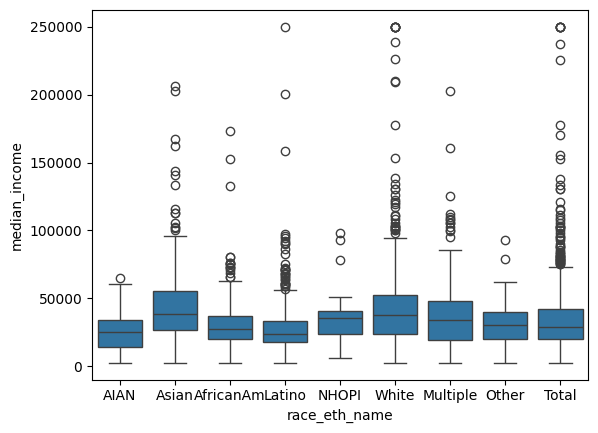

In [26]:
#Raça e Renda
#usando a biblioteca seaborn
sns.boxplot(data=data, x='race_eth_name', y='median_income')
#brancos e asiáticos tem renda maior que a média, explicitado no "Total"
#predominância de outliers nos brancos mostra que os super ricos são brancos

<Axes: xlabel='race_eth_name', ylabel='affordability_ratio'>

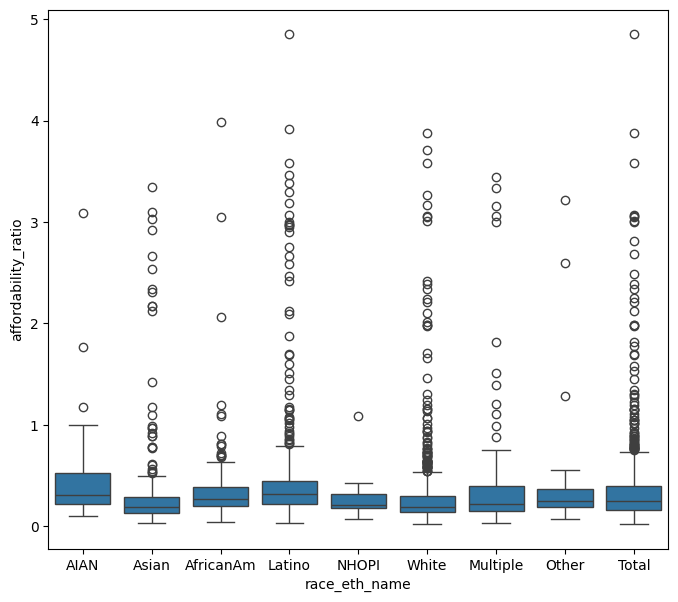

In [70]:
#affordability e raça
#aqui vamos usar a biblioteca matplotlib e seaborn, isso se repete nas análises gráficas
plt.figure(figsize=(8, 7))
sns.boxplot(data=data, x='race_eth_name', y='affordability_ratio')

Conclusão:
Quanto maior o indice, mais dificil comprar a comida - o cálculo é feito custo da comida/renda.
Os brancos e os asiáticos, cujas rendas são superiores do que a média do total, possuem affordability ratios menores, ou seja, maior capacidade de pagar suas comidas

3.3 Análise 2: Distritos

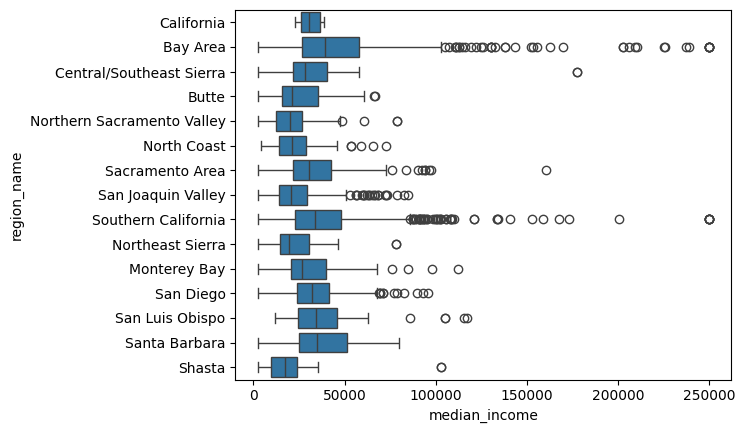

In [73]:
ax = sns.boxplot(data=data, y='region_name', x='median_income')
ax.tick_params(axis='x', labelrotation=90)
#Me chamou atenção que Bay Area é um dos lugares onde tem mais pessoas ricas, não ironicamente é onde se localiza o vale do silício, maior concentração de tecnologia do mundo, abrigando empresas como google e apple

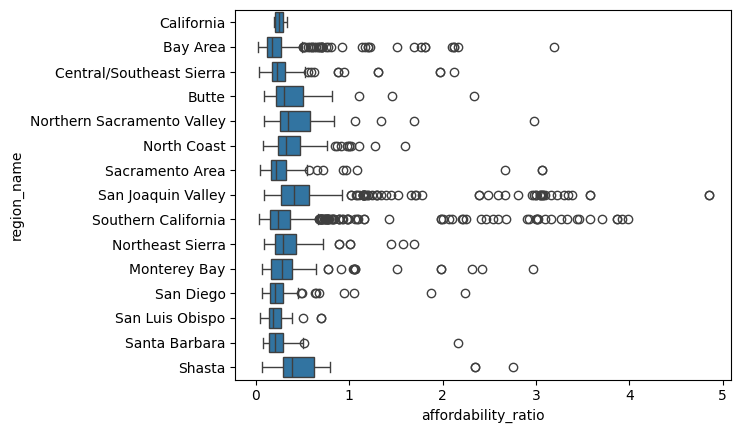

In [74]:
ax = sns.boxplot(data=data, y='region_name', x='affordability_ratio')
#mais uma vez, podemos dar destaque para o Bay Area, onde é localizado o Silicon Valley, onde temos poder de compra alto

Conclusão:
Assim como no caso da renda, as regiões que tem maior mediana de renda, possuem maior poder de compra de comidas, por exemplo, o distrito de Bay Area.

3.4 Análise 3: Tamanho da família

<Axes: >

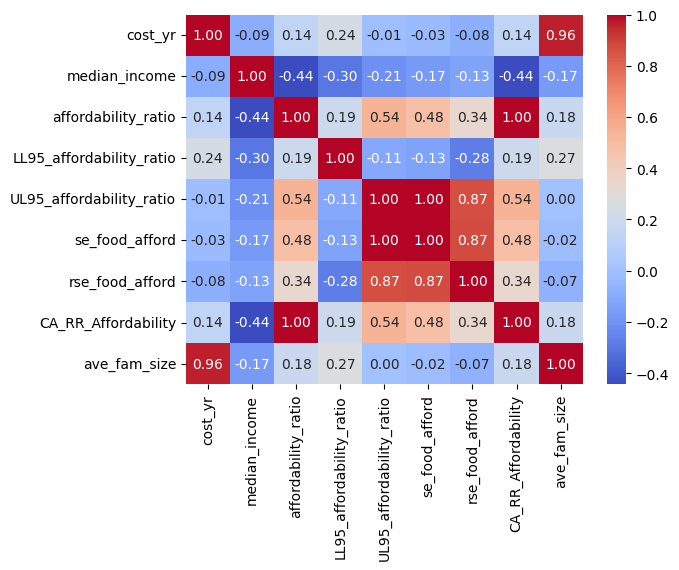

In [75]:
#usamos o heatmap para ver a correlação entre as colunas
colunas=['cost_yr',
'median_income',
'affordability_ratio',
'LL95_affordability_ratio',
'UL95_affordability_ratio',
'se_food_afford',
'rse_food_afford',
'CA_RR_Affordability',
'ave_fam_size']

sns.heatmap(data[colunas].corr(), annot=True, cmap='coolwarm', fmt=".2f")
#quanto maior a família, maior o custo da cesta de comida
#quanto maior a família, menor a renda

C:\Users\natal\AppData\Local\Temp\ipykernel_11340\539555715.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x='region_name', y='ave_fam_size', data=data, palette='viridis')


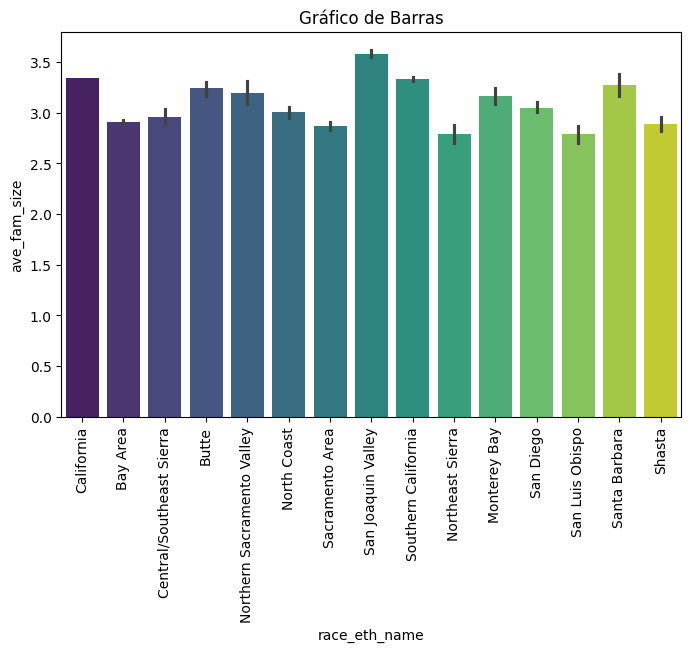

In [65]:
#tamanho da familia por raça
plt.figure(figsize=(8, 5))
ax=sns.barplot(x='region_name', y='ave_fam_size', data=data, palette='viridis')
ax.tick_params(axis='x', labelrotation=90)
# Adicionar rótulos e título
plt.xlabel('race_eth_name')
plt.ylabel('ave_fam_size')
plt.title('Gráfico de Barras')


# Exibir o gráfico
plt.show()

Conclusão:
Famílias maiores tem menos renda anual, o que pode ter a ver com a escolaridade, a falta de informação e acesso a meios contraceptivos. E também, quanto maior a família, maior é o custo da cesta de comida.


4. Machine Learning

In [29]:
#importando
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

In [33]:
# Selecionando features (X) e variável alvo (y)
features = data.drop(['ind_id', 'ind_definition', 'reportyear', 'race_eth_name', 'geotype', 'geoname', 'county_name', 'region_name', 'region_code', 'CA_RR_Affordability', 'version', 'food_afford_decile'], axis=1)
rotulos = data['food_afford_decile']

In [34]:
# Lidando com variáveis categóricas, se necessário
le = LabelEncoder()
features['race_eth_code'] = le.fit_transform(features['race_eth_code'])

# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(features, rotulos, test_size=0.3, random_state=42)

# Criando o modelo KNN com k=3
knn_model = KNeighborsClassifier(n_neighbors=3)

# Treinando o modelo
knn_model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = knn_model.predict(X_test)

# Avaliando a precisão do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {accuracy:.2f}")

# Exibindo o relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred))

Acurácia do modelo: 0.92
Relatório de Classificação:
               precision    recall  f1-score   support

         0.0       0.94      0.98      0.96      4021
         1.0       0.00      0.00      0.00        31
         2.0       0.17      0.04      0.07        23
         3.0       0.10      0.03      0.05        29
         4.0       0.44      0.13      0.21        30
         5.0       0.00      0.00      0.00        20
         6.0       0.15      0.06      0.09        31
         7.0       0.00      0.00      0.00        38
         8.0       0.14      0.03      0.06        29
         9.0       0.29      0.07      0.11        30
        10.0       0.11      0.04      0.05        28

    accuracy                           0.92      4310
   macro avg       0.21      0.13      0.14      4310
weighted avg       0.88      0.92      0.90      4310

